# Import des dataFramees

In [4]:
pip install PyPDF2

  Using cached pypdf2-3.0.1-py3-none-any.whl.metadata (6.8 kB)
Using cached pypdf2-3.0.1-py3-none-any.whl (232 kB)
Note: you may need to restart the kernel to use updated packages.


In [77]:
from Extract import *

flights_df = extract_csv("./data/flights.csv")
airlines_df = extract_json("./data/airlines.json")
airports_df = extract_excel("./data/airports.xlsx")
weather_df = extract_pdf("./data/weather.pdf")
planes_df = extract_html("./data/planes.html")

In [9]:
airlines_df.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [19]:
airports_df.drop(columns=['Unnamed: 0'])

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


In [11]:
flights_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2021,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2021-01-01T05:00:00Z
1,2021,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2021-01-01T05:00:00Z
2,2021,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2021-01-01T05:00:00Z
3,2021,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2021-01-01T05:00:00Z
4,2021,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2021-01-01T06:00:00Z


In [12]:
weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2021,1,1,0,37.04,21.92,53.97,230,10.35702,11.918651,0.0,1013.9,10.0,2021-01-01T00:00:00Z
1,EWR,2021,1,1,1,37.04,21.92,53.97,230,13.80936,15.891535,0.0,1013,10.0,2021-01-01T01:00:00Z
2,EWR,2021,1,1,2,37.94,21.92,52.09,230,12.65858,14.567241,0.0,1012.6,10.0,2021-01-01T02:00:00Z
3,EWR,2021,1,1,3,37.94,23.00,54.51,230,13.80936,15.891535,0.0,1012.7,10.0,2021-01-01T03:00:00Z
4,EWR,2021,1,1,4,37.94,24.08,57.04,240,14.96014,17.215830,0.0,1012.8,10.0,2021-01-01T04:00:00Z


In [58]:
planes_df = planes_df[0].drop(columns=['Unnamed: 0'])
planes_df.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


# QUESTION 1

Combien y-a-t-il 
d’aéroports en tout, de départ et de destination

In [14]:
# How many unique departure and destination airports are there in the flights dataset?
departure_airports = flights_df['origin'].nunique()
total_airports = airports_df.shape[0]
destination_airports = flights_df['dest'].nunique()
print(f"Number of unique departure airports: {departure_airports}")
print(f"Number of unique destination airports: {destination_airports}")
print(f"Total number of airports in the dataset: {total_airports}")

Number of unique departure airports: 3
Number of unique destination airports: 103
Total number of airports in the dataset: 1458


Combien y-a-t-il 
d’aéroports où on ne passe pas à l’heure d’été (indice : colonne dst : 23) ?

In [45]:
no_dst_airports = airports_df[airports_df['dst'] == 'N'].shape[0]
print(f"Number of airports that do not observe daylight saving time: {no_dst_airports}")

Number of airports that do not observe daylight saving time: 23


Combien y-a-t-il 
de fuseaux horaires (10 voir colone tzone dont une « N »)?


In [46]:
num_timezones = airports_df['tzone'].nunique()
print(f"Nombre de fuseaux horaires : {num_timezones}")

Nombre de fuseaux horaires : 10


 Combien y-a-t-il de compagnies, d’avions, de vols annulés ?

In [59]:
num_airlines = airlines_df['carrier'].nunique()
print(f"Nombre de compagnies : {num_airlines}")
num_planes = flights_df['tailnum'].nunique()
print(f"Nombre d’avions uniques : {num_planes}")
# Vols annulés = dep_time manquant ou arr_time manquant
num_cancelled = flights_df[flights_df['dep_time'].isna() | flights_df['arr_time'].isna()].shape[0]
print(f"Nombre de vols annulés : {num_cancelled}")




Nombre de compagnies : 16
Nombre d’avions uniques : 3983
Nombre de vols annulés : 0


# Question 2

 Quel est l’aéroport de départ le plus emprunté ?

In [147]:
# ============= Aéroport de départ le plus emprunté =============
most_used_origin = flights_df['origin'].value_counts().idxmax()
count = flights_df['origin'].value_counts().max()
print(f"\n AÉROPORT DE DÉPART LE PLUS EMPRUNTÉ : {most_used_origin} ({count:,} vols)")



 AÉROPORT DE DÉPART LE PLUS EMPRUNTÉ : EWR (91,241 vols)


Quelles sont les 10 destinations les plus (moins)
prisées (en indiquant le nom complet des destinations et non juste le code correspondant et le %
corresp pour chaque destination) ?

In [146]:
# =============  Top 10 destinations =============
total_flights = len(flights_df)

# TOP 10 DESTINATIONS
top10_dest = flights_df['dest'].value_counts().head(10).reset_index()
top10_dest.columns = ['dest', 'count']
top10_dest['percentage'] = (top10_dest['count'] / total_flights * 100).round(2)

# Jointure pour noms complets
top10_dest = top10_dest.merge(
    airports_df[['faa', 'name']], 
    left_on='dest', 
    right_on='faa',
    how='left'
).drop('faa', axis=1)

print("\n TOP 10 DESTINATIONS LES PLUS PRISÉES :")
for _, row in top10_dest.iterrows():
    print(f"   {row['dest']} - {row['name']}: {row['count']:,} vols ({row['percentage']:.2f}%)")

# BOTTOM 10 DESTINATIONS
bottom10_dest = flights_df['dest'].value_counts().tail(10).reset_index()
bottom10_dest.columns = ['dest', 'count']
bottom10_dest['percentage'] = (bottom10_dest['count'] / total_flights * 100).round(2)

# Jointure pour noms complets
bottom10_dest = bottom10_dest.merge(
    airports_df[['faa', 'name']], 
    left_on='dest', 
    right_on='faa',
    how='left'
).drop('faa', axis=1)

print("\n TOP 10 DESTINATIONS LES MOINS PRISÉES :")
for _, row in bottom10_dest.iterrows():
    print(f"   {row['dest']} - {row['name']}: {row['count']} vols ({row['percentage']:.2f}%)")


 TOP 10 DESTINATIONS LES PLUS PRISÉES :
   ATL - Hartsfield Jackson Atlanta Intl: 12,946 vols (5.12%)
   ORD - Chicago Ohare Intl: 12,654 vols (5.01%)
   LAX - Los Angeles Intl: 11,895 vols (4.71%)
   BOS - General Edward Lawrence Logan Intl: 11,560 vols (4.57%)
   MCO - Orlando Intl: 10,637 vols (4.21%)
   CLT - Charlotte Douglas Intl: 10,448 vols (4.13%)
   SFO - San Francisco Intl: 9,729 vols (3.85%)
   FLL - Fort Lauderdale Hollywood Intl: 9,443 vols (3.74%)
   MIA - Miami Intl: 8,938 vols (3.54%)
   DCA - Ronald Reagan Washington Natl: 7,386 vols (2.92%)

 TOP 10 DESTINATIONS LES MOINS PRISÉES :
   CHO - Charlottesville-Albemarle: 31 vols (0.01%)
   JAC - Jackson Hole Airport: 25 vols (0.01%)
   BZN - Gallatin Field: 20 vols (0.01%)
   PSP - Palm Springs Intl: 19 vols (0.01%)
   EYW - Key West Intl: 17 vols (0.01%)
   TVC - Cherry Capital Airport: 16 vols (0.01%)
   MTJ - Montrose Regional Airport: 15 vols (0.01%)
   HDN - Yampa Valley: 15 vols (0.01%)
   SBN - South Bend Rgnl: 4

  Quelle sont les 10 avions qui ont le plus (moins) décollé ?

In [145]:
# =============  Top 10 avions =============
# TOP 10 AVIONS
top10_planes = flights_df['tailnum'].value_counts().head(10)
print("\n TOP 10 AVIONS LES PLUS UTILISÉS :")
for tailnum, count in top10_planes.items():
    print(f"   {tailnum}: {count} décollages")

# BOTTOM 10 AVIONS
bottom10_planes = flights_df['tailnum'].value_counts().tail(10)
print("\n TOP 10 AVIONS LES MOINS UTILISÉS :")
for tailnum, count in bottom10_planes.items():
    print(f"   {tailnum}: {count} décollages")


 TOP 10 AVIONS LES PLUS UTILISÉS :
    : 1973 décollages
   N725MQ: 443 décollages
   N723MQ: 394 décollages
   N713MQ: 385 décollages
   N722MQ: 378 décollages
   N711MQ: 376 décollages
   N258JB: 332 décollages
   N353JB: 316 décollages
   N351JB: 310 décollages
   N542MQ: 310 décollages

 TOP 10 AVIONS LES MOINS UTILISÉS :
   N601WN: 1 décollages
   N456UW: 1 décollages
   N750AT: 1 décollages
   N670US: 1 décollages
   N913EV: 1 décollages
   N8618N: 1 décollages
   N27901: 1 décollages
   N827AW: 1 décollages
   N670SW: 1 décollages
   N451UW: 1 décollages


# Question 3

Combien chaque compagnie a desservi de destination ; combien chaque compagnie a desservie de
destination par aéroport d’origine. Réaliser les graphiques adéquats qui synthétisent ces
informations ? 

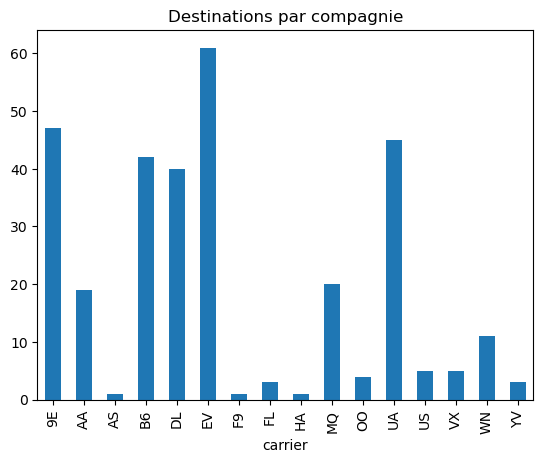

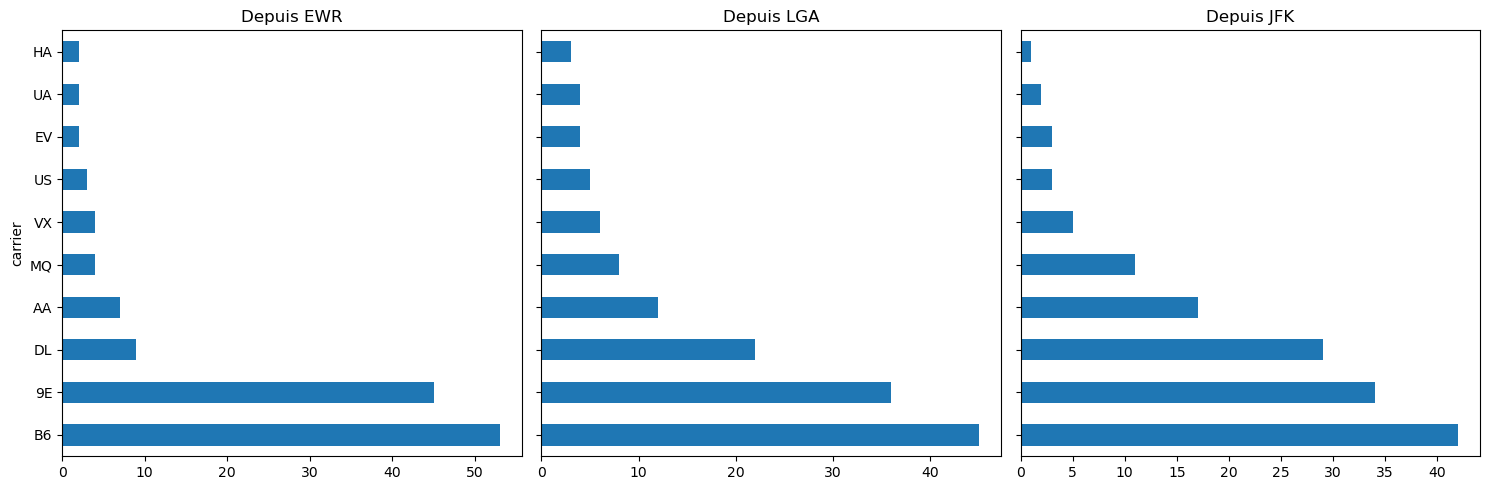

In [142]:
# Nombre de destinations desservies par compagnie
dest_per_carrier = flights_df.groupby('carrier')['dest'].nunique()
#print("Nombre de destinations desservies par compagnie :")
#print(dest_per_carrier)

# Nombre de destinations par compagnie et aéroport d’origine
dest_per_carrier_origin = flights_df.groupby(['carrier','origin'])['dest'].nunique()
#print("Nombre de destinations par compagnie et aéroport d’origine :")
#print(dest_per_carrier_origin)

dest_per_carrier.plot(kind='bar', title='Destinations par compagnie')
#dest_per_carrier_origin.unstack().plot(kind='bar', title='Destinations par compagnie et aéroport d’origine')
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
origins = flights_df['origin'].unique()

for i, origin in enumerate(origins):
    data = dest_per_carrier_origin.xs(origin, level='origin')
    data.sort_values(ascending=False).plot(
        kind='barh', ax=axes[i], title=f'Depuis {origin}'
    )
    
plt.tight_layout()
plt.show()

# Question 4

Trouver tous les vols ayant atterri à Houston (IAH ou HOU) ? 

In [138]:
# ============= VOLS VERS HOUSTON =============
houston_flights = flights_df[flights_df['dest'].isin(['IAH','HOU'])]
print(f"\n Vols ayant atterri à HOUSTON : {len(houston_flights):,} vols trouvés")




 Vols ayant atterri à HOUSTON : 6,958 vols trouvés


Combien de vols partent de NYC
airports vers Seattle, combien de compagnies desservent cette destination et combien d’avions
“uniques” ?

In [137]:
# ============= VOLS NYC -> SEATTLE =============
nyc_airports = ['JFK','LGA','EWR']
seattle_flights = flights_df[
    (flights_df['origin'].isin(nyc_airports)) & 
    (flights_df['dest'] == 'SEA')
]

print(f"\nNYC → SEATTLE : {len(seattle_flights):,} vols")
print(f"Compagnies qui desservent cette destination : {seattle_flights['carrier'].nunique()}")
print(f"Avions uniques : {seattle_flights['tailnum'].nunique()}")


NYC → SEATTLE : 2,736 vols
Compagnies qui desservent cette destination : 5
Avions uniques : 857


# Question 5

Trouver le nombre de vols par destination ? 

In [ ]:

flights_per_dest = flights_df.groupby('dest').size().reset_index(name='num_flights')
flights_per_dest = flights_per_dest.merge(
    airports_df[['faa','name']], 
    left_on='dest', 
    right_on='faa',
    how='left'
).drop('faa', axis=1)  # Supprimer la colonne redondante

print("\n NOMBRE DE VOLS PAR DESTINATION :")
print(flights_per_dest.sort_values('num_flights', ascending=False).head(10))



 NOMBRE DE VOLS PAR DESTINATION :
   dest  num_flights                                name
3   ATL        12946     Hartsfield Jackson Atlanta Intl
67  ORD        12654                  Chicago Ohare Intl
48  LAX        11895                    Los Angeles Intl
10  BOS        11560  General Edward Lawrence Logan Intl
52  MCO        10637                        Orlando Intl
22  CLT        10448              Charlotte Douglas Intl
88  SFO         9729                  San Francisco Intl
34  FLL         9443      Fort Lauderdale Hollywood Intl
56  MIA         8938                          Miami Intl
27  DCA         7386       Ronald Reagan Washington Natl


Trier les vols suivant la destination, l’aéroport d’origine,
la compagnie dans un ordre alphabétique croissant (en réalisant les jointures nécessaires pour
obtenir les noms explicites des aéroports) ?

In [ ]:

flights_sorted = flights_df.copy()

# Jointure 1 : Nom de la destination
flights_sorted = flights_sorted.merge(
    airports_df[['faa', 'name']], 
    left_on='dest', 
    right_on='faa',
    how='left'
).rename(columns={'name': 'dest_name'}).drop('faa', axis=1)

# Jointure 2 : Nom de l'origine
flights_sorted = flights_sorted.merge(
    airports_df[['faa', 'name']], 
    left_on='origin', 
    right_on='faa',
    how='left'
).rename(columns={'name': 'origin_name'}).drop('faa', axis=1)

# Jointure 3 : Nom de la compagnie
flights_sorted = flights_sorted.merge(
    airlines_df[['carrier', 'name']], 
    on='carrier',
    how='left'
).rename(columns={'name': 'carrier_name'})

# Tri alphabétique croissant par destination, origine, compagnie
flights_sorted = flights_sorted.sort_values(
    by=['dest_name', 'origin_name', 'carrier_name']
)

print("\n VOLS TRIÉS (échantillon des 10 premiers) :")
print(flights_sorted[['dest_name', 'origin_name', 'carrier_name', 'dep_time', 'arr_time']].head(10))


 VOLS TRIÉS (échantillon des 10 premiers) :
                          dest_name origin_name                 carrier_name  \
288   Akron Canton Regional Airport  La Guardia  AirTran Airways Corporation   
759   Akron Canton Regional Airport  La Guardia  AirTran Airways Corporation   
1195  Akron Canton Regional Airport  La Guardia  AirTran Airways Corporation   
1691  Akron Canton Regional Airport  La Guardia  AirTran Airways Corporation   
2126  Akron Canton Regional Airport  La Guardia  AirTran Airways Corporation   
2608  Akron Canton Regional Airport  La Guardia  AirTran Airways Corporation   
3058  Akron Canton Regional Airport  La Guardia  AirTran Airways Corporation   
3534  Akron Canton Regional Airport  La Guardia  AirTran Airways Corporation   
3895  Akron Canton Regional Airport  La Guardia  AirTran Airways Corporation   
4284  Akron Canton Regional Airport  La Guardia  AirTran Airways Corporation   

     dep_time arr_time  
288      1147     1335  
759      2020     2148  

# Question 6


Quelles sont les compagnies qui n'opèrent pas sur tous les aéroports d’origine ? 


In [ ]:
# ============= Compagnies qui n'opèrent pas sur tous les aéroports =============
total_origins = flights_df['origin'].nunique()
origins_per_carrier = flights_df.groupby('carrier')['origin'].nunique()
companies_not_all_origins = origins_per_carrier[origins_per_carrier < total_origins]

print(f" Nombre total d'aéroports d'origine : {total_origins}")
print(f"\n COMPAGNIES N'OPÉRANT PAS SUR TOUS LES AÉROPORTS ({len(companies_not_all_origins)}/{len(origins_per_carrier)}) :")
for carrier, num_origins in companies_not_all_origins.items():
    carrier_name = airlines_df[airlines_df['carrier']==carrier]['name'].values[0]
    print(f"   {carrier} ({carrier_name}): {num_origins}/{total_origins} aéroports")

 Nombre total d'aéroports d'origine : 3

 COMPAGNIES N'OPÉRANT PAS SUR TOUS LES AÉROPORTS (8/16) :
   AS (Alaska Airlines Inc.): 1/3 aéroports
   F9 (Frontier Airlines Inc.): 1/3 aéroports
   FL (AirTran Airways Corporation): 1/3 aéroports
   HA (Hawaiian Airlines Inc.): 1/3 aéroports
   OO (SkyWest Airlines Inc.): 2/3 aéroports
   VX (Virgin America): 2/3 aéroports
   WN (Southwest Airlines Co.): 2/3 aéroports
   YV (Mesa Airlines Inc.): 1/3 aéroports


Quelles sont les
compagnies qui desservent l’ensemble de destinations ?

In [131]:
# ============= Compagnies desservant toutes les destinations =============
total_destinations = flights_df['dest'].nunique()
destinations_per_carrier = flights_df.groupby('carrier')['dest'].nunique()
companies_all_destinations = destinations_per_carrier[destinations_per_carrier == total_destinations]

print(f"\n Nombre total de destinations : {total_destinations}")
print(f"\n COMPAGNIES DESSERVANT TOUTES LES DESTINATIONS :")
if len(companies_all_destinations) > 0:
    for carrier in companies_all_destinations.index:
        carrier_name = airlines_df[airlines_df['carrier']==carrier]['name'].values[0]
        print(f"   {carrier} ({carrier_name})")
else:
    print("    Aucune compagnie ne dessert toutes les destinations")


 Nombre total de destinations : 103

 COMPAGNIES DESSERVANT TOUTES LES DESTINATIONS :
    Aucune compagnie ne dessert toutes les destinations


Faire un tableau où l’on récupère l’ensemble des origines et des destinations pour l’ensemble des
compagnies.

In [132]:
# ============= Tableau complet origines/destinations par compagnie =============
carrier_coverage = flights_df.groupby('carrier').agg({
    'origin': lambda x: ', '.join(sorted(x.unique())),
    'dest': lambda x: ', '.join(sorted(x.unique()))
}).reset_index()

carrier_coverage = carrier_coverage.merge(airlines_df[['carrier', 'name']], on='carrier')
carrier_coverage['num_origins'] = flights_df.groupby('carrier')['origin'].nunique().values
carrier_coverage['num_destinations'] = flights_df.groupby('carrier')['dest'].nunique().values

carrier_coverage = carrier_coverage[['carrier', 'name', 'num_origins', 'origin', 'num_destinations', 'dest']]

print("\n TABLEAU COMPLET ORIGINES ET DESTINATIONS PAR COMPAGNIE :")
print(carrier_coverage.to_string(index=False))


 TABLEAU COMPLET ORIGINES ET DESTINATIONS PAR COMPAGNIE :
carrier                        name  num_origins        origin  num_destinations                                                                                                                                                                                                                                                                                                            dest
     9E           Endeavor Air Inc.            3 EWR, JFK, LGA                47                                                                       ATL, AUS, AVL, BGR, BNA, BOS, BTV, BUF, BWI, CAE, CHS, CLE, CLT, CMH, CVG, DAY, DCA, DFW, DSM, DTW, GRR, GSP, IAD, IND, JAX, LEX, MCI, MEM, MHT, MKE, MSP, MSY, MVY, ORD, ORF, PHL, PIT, RDU, RIC, ROC, RSW, SAT, SDF, SRQ, SYR, TPA, TYS
     AA      American Airlines Inc.            3 EWR, JFK, LGA                19                                                                                           

# Question 7

Quelles sont les destinations qui sont exclusives à certaines compagnies ? 

In [ ]:
# Trouver les destinations desservies par une seule compagnie
carriers_per_dest = flights_df.groupby('dest')['carrier'].nunique()
exclusive_dest = carriers_per_dest[carriers_per_dest == 1].index

print(f" Nombre de destinations exclusives : {len(exclusive_dest)}")

# Pour chaque destination exclusive, trouver QUELLE compagnie
exclusive_details = []

for dest in exclusive_dest:
    # Trouver la compagnie unique pour cette destination
    carrier = flights_df[flights_df['dest'] == dest]['carrier'].iloc[0]
    
    # Récupérer les noms complets
    dest_name = airports_df[airports_df['faa'] == dest]['name'].values
    dest_name = dest_name[0] if len(dest_name) > 0 else "Inconnu"
    
    carrier_name = airlines_df[airlines_df['carrier'] == carrier]['name'].values
    carrier_name = carrier_name[0] if len(carrier_name) > 0 else "Inconnu"
    
    # Compter le nombre de vols
    num_flights = len(flights_df[(flights_df['dest'] == dest) & (flights_df['carrier'] == carrier)])
    
    exclusive_details.append({
        'dest': dest,
        'dest_name': dest_name,
        'carrier': carrier,
        'carrier_name': carrier_name,
        'num_flights': num_flights
    })

# Création d'une DataFrame pour un affichage propre
exclusive_df = pd.DataFrame(exclusive_details)
exclusive_df = exclusive_df.sort_values('num_flights', ascending=False)

print("\n DESTINATIONS EXCLUSIVES À UNE SEULE COMPAGNIE :")
print(exclusive_df.to_string(index=False))



 Nombre de destinations exclusives : 29

 DESTINATIONS EXCLUSIVES À UNE SEULE COMPAGNIE :
dest                         dest_name carrier                carrier_name  num_flights
 MDW               Chicago Midway Intl      WN      Southwest Airlines Co.         3096
 GSO                    Piedmont Triad      EV    ExpressJet Airlines Inc.         1199
 CAK     Akron Canton Regional Airport      FL AirTran Airways Corporation          622
 SNA         John Wayne Arpt Orange Co      UA       United Air Lines Inc.          600
 SAV         Savannah Hilton Head Intl      EV    ExpressJet Airlines Inc.          598
 LGB                        Long Beach      B6             JetBlue Airways          498
 MSN            Dane Co Rgnl Truax Fld      EV    ExpressJet Airlines Inc.          441
 ALB                       Albany Intl      EV    ExpressJet Airlines Inc.          386
 PVD      Theodore Francis Green State      EV    ExpressJet Airlines Inc.          331
 BUR                          

In [129]:
# Version plus lisible
print("\n DESTINATIONS EXCLUSIVES À UNE SEULE COMPAGNIE :")
for _, row in exclusive_df.iterrows():
    print(f"   {row['dest']} ({row['dest_name']})")
    print(f"      → Exclusif à : {row['carrier']} - {row['carrier_name']}")
    print(f"      → numéro de vols: {row['num_flights']}")


 DESTINATIONS EXCLUSIVES À UNE SEULE COMPAGNIE :
   MDW (Chicago Midway Intl)
      → Exclusif à : WN - Southwest Airlines Co.
      → numéro de vols: 3096
   GSO (Piedmont Triad)
      → Exclusif à : EV - ExpressJet Airlines Inc.
      → numéro de vols: 1199
   CAK (Akron Canton Regional Airport)
      → Exclusif à : FL - AirTran Airways Corporation
      → numéro de vols: 622
   SNA (John Wayne Arpt Orange Co)
      → Exclusif à : UA - United Air Lines Inc.
      → numéro de vols: 600
   SAV (Savannah Hilton Head Intl)
      → Exclusif à : EV - ExpressJet Airlines Inc.
      → numéro de vols: 598
   LGB (Long Beach)
      → Exclusif à : B6 - JetBlue Airways
      → numéro de vols: 498
   MSN (Dane Co Rgnl Truax Fld)
      → Exclusif à : EV - ExpressJet Airlines Inc.
      → numéro de vols: 441
   ALB (Albany Intl)
      → Exclusif à : EV - ExpressJet Airlines Inc.
      → numéro de vols: 386
   PVD (Theodore Francis Green State)
      → Exclusif à : EV - ExpressJet Airlines Inc.
   

# Question 8

Filtrer le vol pour trouver ceux exploités par United, American ou Delta ?

In [130]:
us_carriers = ['UA','AA','DL']
us_flights = flights_df[flights_df['carrier'].isin(us_carriers)]
print(f"\n VOLS DES COMPAGNIES US (UA, AA, DL) : {len(us_flights):,} vols")


 VOLS DES COMPAGNIES US (UA, AA, DL) : 104,742 vols
